In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)
train_data, test_data = imdb["train"], imdb["test"]

In [ ]:
tokenizer = info.features['text'].encoder

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_data = train_data.shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_data))
test_data = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [ ]:
# simple_model = Sequential()

# simple_model.add(layers.Embedding(tokenizer.vocab_size, 16))
# simple_model.add(layers.GlobalMaxPool1D())
# simple_model.add(layers.Dense(16, activation="relu"))
# simple_model.add(layers.Dense(1, activation="sigmoid"))

# simple_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# conv_model = Sequential()
# conv_model.add(layers.Embedding(tokenizer.vocab_size, 16))
# conv_model.add(layers.Conv1D(64, 5, activation="relu"))
# conv_model.add(layers.GlobalMaxPool1D())
# conv_model.add(layers.Dense(16, activation="relu"))
# conv_model.add(layers.Dense(1, activation="sigmoid"))
# conv_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
lstm_1_model = Sequential()
lstm_1_model.add(layers.Embedding(tokenizer.vocab_size, 16))
lstm_1_model.add(layers.Bidirectional(layers.LSTM(8)))
lstm_1_model.add(layers.Dense(8, activation="relu"))
lstm_1_model.add(layers.Dense(1, activation="sigmoid"))
lstm_1_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
lstm_2_model = Sequential()
lstm_2_model.add(layers.Embedding(tokenizer.vocab_size, 16))
lstm_2_model.add(layers.Bidirectional(layers.LSTM(8, return_sequences=True)))
lstm_2_model.add(layers.Bidirectional(layers.LSTM(8)))
lstm_2_model.add(layers.Dense(8, activation="relu"))
lstm_2_model.add(layers.Dense(1, activation="sigmoid"))
lstm_2_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
simple_history = simple_model.fit(train_data, epochs=30, validation_data=test_data, verbose=1)

In [ ]:
conv_history = conv_model.fit(train_data, epochs=30, validation_data=test_data, verbose=1)

In [ ]:
lstm_1_history = lstm_1_model.fit(train_data, epochs=20, validation_data=test_data, verbose=1)

In [ ]:
lstm_2_history = lstm_2_model.fit(train_data, epochs=30, validation_data=test_data, verbose=1)

Epoch 1/30
391/391 [==============================] - 143s 337ms/step - loss: 0.5435 - accuracy: 0.7166 - val_loss: 0.4088 - val_accuracy: 0.8306
Epoch 2/30
391/391 [==============================] - 108s 275ms/step - loss: 0.3413 - accuracy: 0.8669 - val_loss: 0.4029 - val_accuracy: 0.8268
Epoch 3/30
391/391 [==============================] - 89s 226ms/step - loss: 0.3578 - accuracy: 0.8538 - val_loss: 0.4267 - val_accuracy: 0.8226
Epoch 4/30
391/391 [==============================] - 86s 221ms/step - loss: 0.3065 - accuracy: 0.8816 - val_loss: 0.4288 - val_accuracy: 0.8280
Epoch 5/30
391/391 [==============================] - 82s 209ms/step - loss: 0.2440 - accuracy: 0.9130 - val_loss: 0.4876 - val_accuracy: 0.8203
Epoch 6/30
391/391 [==============================] - 78s 198ms/step - loss: 0.2261 - accuracy: 0.9218 - val_loss: 0.5708 - val_accuracy: 0.7034
Epoch 7/30
391/391 [==============================] - 74s 189ms/step - loss: 0.2629 - accuracy: 0.8982 - val_loss: 0.4878 - val_

In [ ]:
fig = plt.subplot(1, 2, 1)
plt.plot(simple_history.history["accuracy"])
plt.plot(simple_history.history["val_accuracy"])
plt.title("simple model accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy", "val_accuracy"])

fig = plt.subplot(1, 2, 2)
plt.plot(simple_history.history["loss"])
plt.plot(simple_history.history["val_loss"])
plt.title("simple model accuracy")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["loss", "val_loss"])

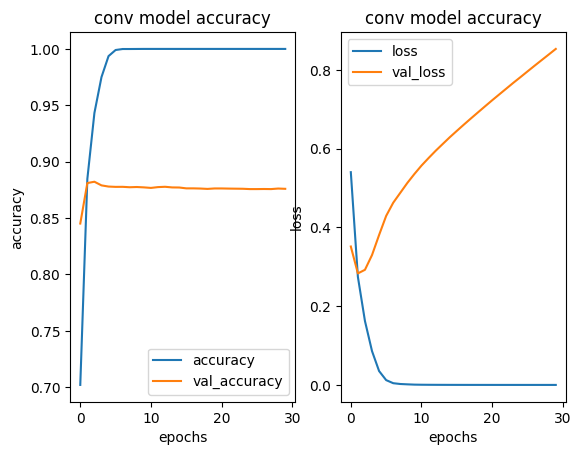

In [ ]:
fig = plt.subplot(1, 2, 1)
plt.plot(conv_history.history["accuracy"])
plt.plot(conv_history.history["val_accuracy"])
plt.title("conv model accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy", "val_accuracy"])

fig = plt.subplot(1, 2, 2)
plt.plot(conv_history.history["loss"])
plt.plot(conv_history.history["val_loss"])
plt.title("conv model accuracy")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["loss", "val_loss"])

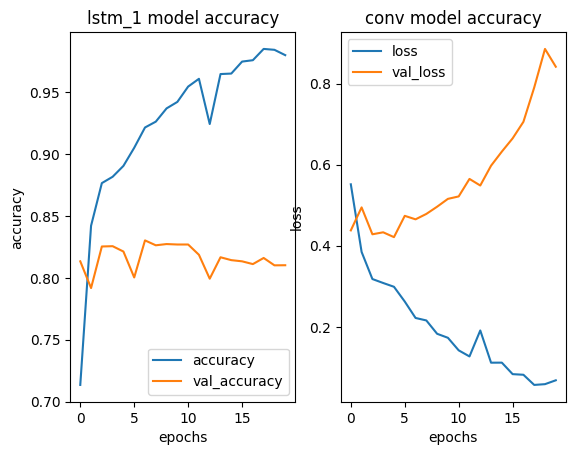

In [ ]:
fig = plt.subplot(1, 2, 1)
plt.plot(lstm_1_history.history["accuracy"])
plt.plot(lstm_1_history.history["val_accuracy"])
plt.title("lstm_1 model accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy", "val_accuracy"])

fig = plt.subplot(1, 2, 2)
plt.plot(lstm_1_history.history["loss"])
plt.plot(lstm_1_history.history["val_loss"])
plt.title("conv model accuracy")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["loss", "val_loss"])

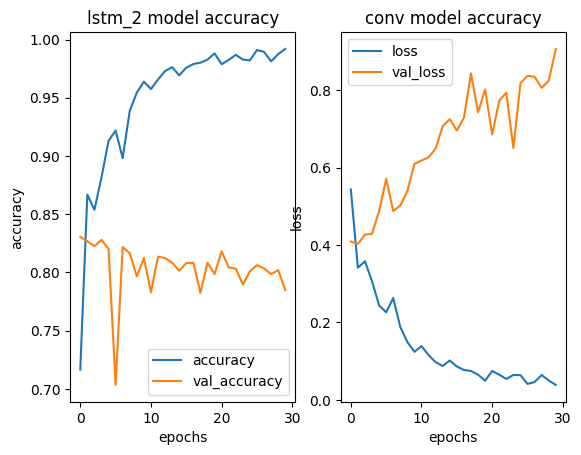

In [ ]:
fig = plt.subplot(1, 2, 1)
plt.plot(lstm_2_history.history["accuracy"])
plt.plot(lstm_2_history.history["val_accuracy"])
plt.title("lstm_2 model accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy", "val_accuracy"])

fig = plt.subplot(1, 2, 2)
plt.plot(lstm_2_history.history["loss"])
plt.plot(lstm_2_history.history["val_loss"])
plt.title("conv model accuracy")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["loss", "val_loss"])